### Regional Sales Data

This notebook holds some visual graphs for potential regions based on store and warehouse ID.
The main findings are a strong correllation between sales teams with sales channels, and store with warehouse.

In [1]:
# Read in the data
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

data = pd.read_csv("./US_Regional_Sales_data.csv");

# Find rows and column amount of data
data_rows = data.shape[0];
data_columns = data.shape[1];

# Display the data frame
data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"


In [3]:
#WarehouseCode: ['WARE-MKL1006' 'WARE-NBV1002' 'WARE-NMK1003' 'WARE-PUJ1005' 'WARE-UHY1004' 'WARE-XYS1001']

# In order to use a correlation matrix, the following data needs to be converted into integers
# The integers entered will be the last four digits of of the warehouse code (i.e. 'WARE-MLK1006' -> '1006').

# reformat data to number
formatted_warehouse = []

for warehouse in data['WarehouseCode']:
    ID = ""
    charArr = list(warehouse)
    for addIn in charArr[8:12]:
        ID += addIn
    #print(int(ID))
    formatted_warehouse.append(int(ID))
#formatted_warehouse
data['WarehouseCode'] = formatted_warehouse
#formatted_warehouse
data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,Online,1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,SO - 0008089,Online,1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,SO - 0008090,Online,1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"


In [4]:
# To use the following column in the correlation matrix, the string data will be converted into an integer.

# The reformatting is as follows:
### in-store    = 1
### online      = 2
### distributor = 3
### wholesale   = 4

formatted_channel = []
for channel in data['Sales Channel']:
    if channel == 'In-Store':
        formatted_channel.append(1)
    if channel == 'Online':
        formatted_channel.append(2)
    if channel == 'Distributor':
        formatted_channel.append(3)
    if channel == 'Wholesale':
        formatted_channel.append(4)
data['Sales Channel'] = formatted_channel
data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,1,1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,2,1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,3,1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,4,1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,3,1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,1,1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,2,1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,SO - 0008089,2,1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,SO - 0008090,2,1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"


C:\Users\yeena\AppData\Local\Temp\ipykernel_17380\3338506432.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


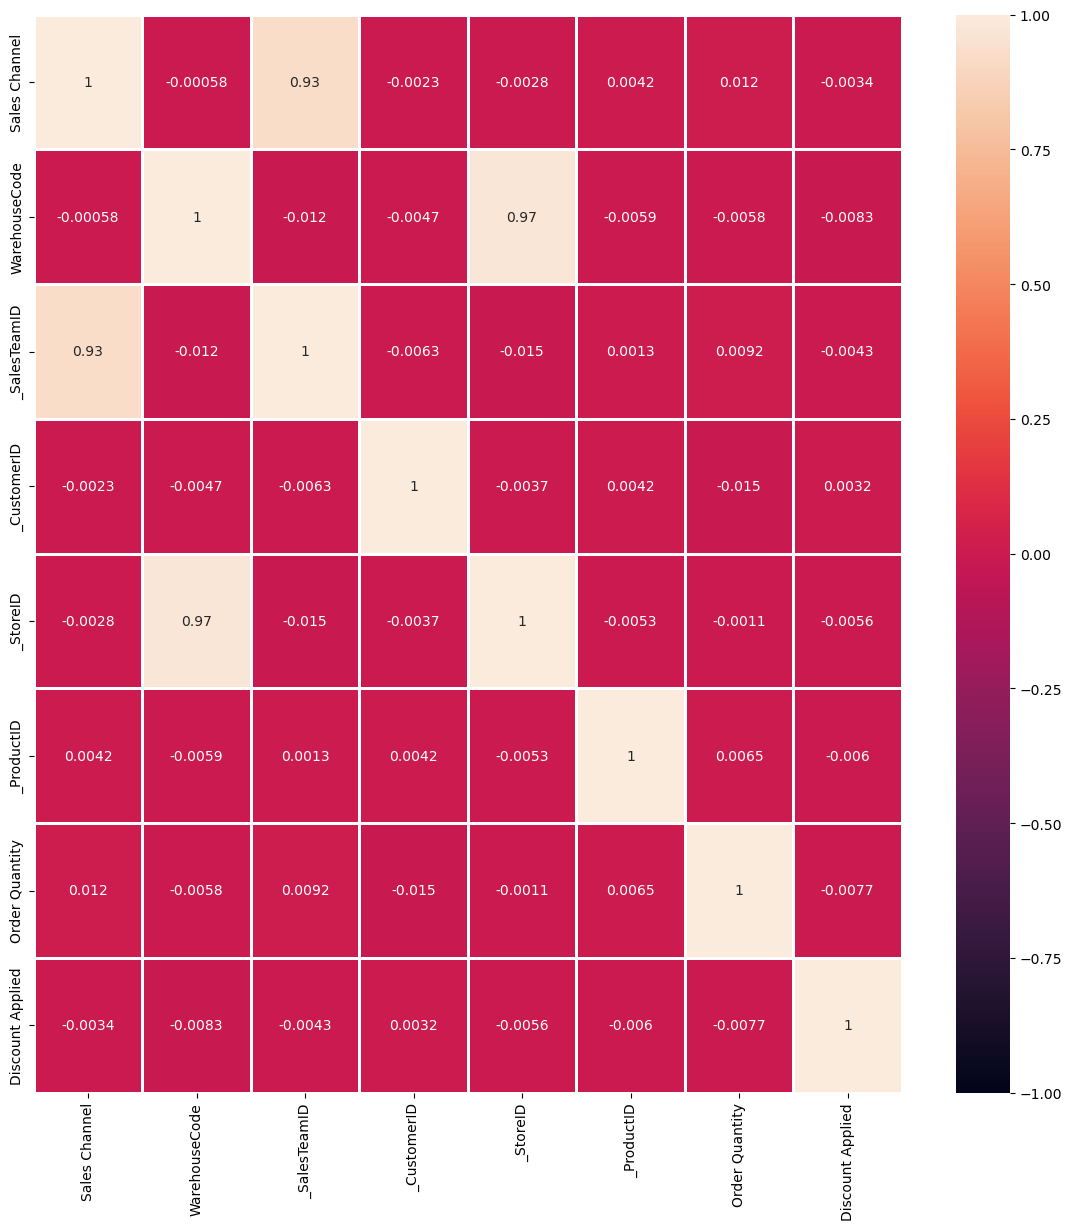

In [11]:
# This prints a correlation matrix.
## The purpose for this matrix is to find if certain attributes are closely linked together.
## If so, we may be able to combine the correlated attributes into a single attribute.

corr_matrix = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidth = 1)
plt.show()

As we can see, there is a strong correlation between the Sales Channel and Sales ID.
There is also a strong correlation with store ID and which warehouse is connected to it.

Text(0, 0.5, 'Sales Channel')

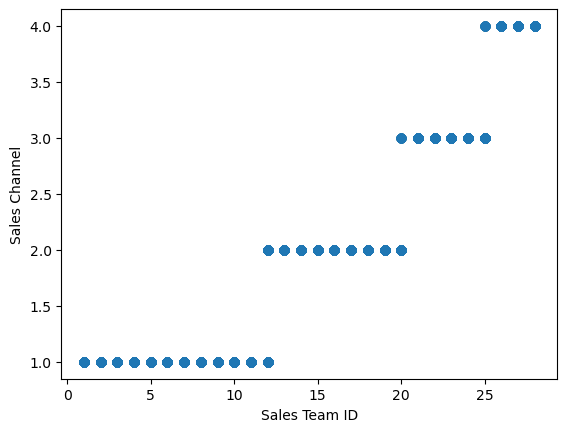

In [6]:
plt.scatter(data['_SalesTeamID'], data['Sales Channel'])
plt.xlabel("Sales Team ID")
plt.ylabel("Sales Channel")

Text(0, 0.5, 'Warehouse')

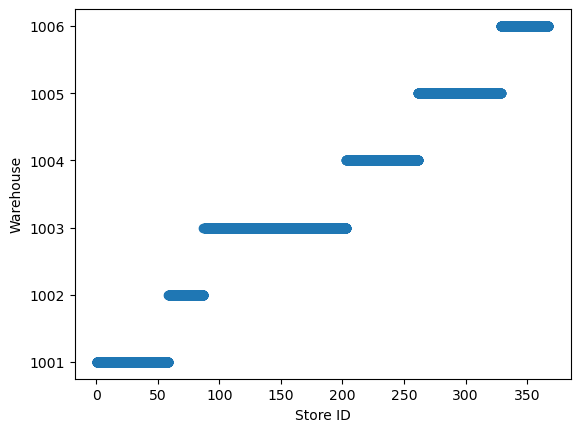

In [7]:
plt.scatter(data['_StoreID'], data['WarehouseCode'])
plt.xlabel("Store ID")
plt.ylabel("Warehouse")

At the very least, we can assume that the sales teams are grouped into the four sales channel, with some overlapping in between.
Likewise, the warehouses all seemed linked to certain stores, with some overlapping in between as well.

Because of this, we can probably throw out channel and warehouse data and simply use sales teams and store ID instead.